In [46]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_squared_error

In [57]:
data = pd.read_csv('dataset/ETHUSDT.csv', header=0, index_col=0)

In [58]:
# tiền sử lý dataset
train_size = int(len(data)*0.7);
val_size = int(len(data)*0.1);
test_size = int(len(data)*0.2);

df_train = data["Close"].iloc[:train_size];
df_val = data["Close"].iloc[train_size:train_size+val_size];
df_test = data["Close"].iloc[train_size+val_size:train_size+val_size+test_size];
#convert index
def convertIndex(df):
    data=[];
    for val in df:
        data.append(float(val));
    return pd.DataFrame(data);

df_train = convertIndex(df_train);
df_val = convertIndex(df_val);
df_test = convertIndex(df_test);



In [49]:
# Xem data
print(df_train);
print(df_val);
print(df_test);

            0
0     1716.71
1     1715.22
2     1773.88
3     1741.88
4     1749.57
...       ...
1045   233.82
1046   235.30
1047   230.86
1048   231.77
1049   238.11

[1050 rows x 1 columns]
          0
0    237.55
1    230.51
2    247.78
3    243.80
4    246.40
..      ...
145  166.79
146  174.14
147  169.85
148  164.21
149  166.40

[150 rows x 1 columns]
          0
0    165.64
1    143.58
2    146.54
3    142.38
4    144.84
..      ...
295  133.98
296  136.09
297  137.28
298  135.98
299  134.85

[300 rows x 1 columns]


In [59]:
# train data => lấy được alpha tối ưu
train_data =df_train.values.tolist()

# Khởi tạo đối tượng SES với dữ liệu huấn luyện
model = SimpleExpSmoothing(train_data)

# Huấn luyện mô hình và ước lượng trọng số alpha
fitted_model = model.fit()

# Lấy trọng số alpha
alpha = fitted_model.params['smoothing_level']

print(alpha)

0.9023579993145902


In [60]:
# Khởi tạo đối tượng SES với trọng số alpha đã được ước lượng từ tập huấn luyện
model = SimpleExpSmoothing(train_data)
fitted_model = model.fit(smoothing_level=alpha)

In [62]:
# Quá trình validate, dự đoán trên tập validation

history = df_train.values.tolist()
predict_val = []
for new_obs in df_val.values:   
    model = SimpleExpSmoothing(history)  
    model_fit = model.fit(smoothing_level=alpha)  
    prediction = model_fit.forecast(steps=1)      
    predict_val.append(prediction[0])   
    history.append(new_obs)

print(predict_val)

[237.48624794408335, 237.54377512171249, 231.19679187525526, 246.1607823809174, 244.03051151485565, 246.16863840370945, 244.7170706721176, 242.21115873647034, 240.24297270284143, 242.92029351861723, 244.36380145864837, 238.35969048658592, 247.266243231726, 233.10261259239056, 242.62915557151007, 222.8141358833644, 220.46427303770838, 209.4787203762923, 201.7286198408687, 203.91357159684247, 200.29189316060982, 205.9840638276646, 207.22565083931775, 199.5685559250688, 208.96340577049946, 214.03158450239346, 214.82422975338062, 207.7639734469424, 201.1641510003194, 195.4755499162941, 202.5269814595707, 199.8677491656953, 190.74694085096476, 186.21986414200856, 187.41109929364916, 207.85753960169987, 210.97289485942284, 211.8997113991598, 200.23248288929892, 204.79617391081044, 206.31558785184524, 209.51391650660054, 213.47173403253123, 212.16175021539945, 206.67383425870054, 214.51186539873447, 198.02410149378696, 196.50443903921064, 197.29450847606648, 194.51117757873425, 188.2657976258

In [63]:
# Quá trình testing, dự đoán trên tập test
history = df_train.values.tolist() + df_val.values.tolist()
predict_test = []
for new_obs in df_test.values:   
    model = SimpleExpSmoothing(history)  
    model_fit = model.fit(smoothing_level=alpha)  
    prediction = model_fit.forecast(steps=1)      
    predict_test.append(prediction[0])   
    history.append(new_obs)

print(predict_test)

[166.24326390779416, 165.6989038948983, 145.73973402926617, 146.4618604295371, 142.7785610188586, 144.63871697359048, 138.41360452746378, 140.4947989316898, 142.57491555570806, 143.99620560361086, 136.21227997346026, 134.39648304254783, 134.35453869727232, 127.88955989238971, 130.48874806503844, 129.2897416194772, 131.36539816963239, 134.06760108602674, 128.69171208932522, 126.52450797347205, 125.67222364819312, 125.14684948185594, 127.49582317532315, 127.7702995662764, 131.66821580728958, 127.44679035106185, 128.11743152294898, 128.10170204877573, 132.32320162824, 122.89969510054249, 131.77014936226936, 141.4162215967038, 141.75350352888915, 144.50253398947973, 144.83411988354894, 143.5310067546593, 145.36188504014774, 147.18294721770687, 150.12197484999894, 147.43116599034747, 148.3505190089312, 148.12446117724176, 145.64797468014933, 147.02138640267592, 148.49097891001384, 150.51137750119693, 151.28616238138335, 154.24935952499226, 151.06461372515835, 152.46812897228583, 147.9580273

In [65]:
# 7. Đánh giá độ chính xác validate, test

y_val = df_val.values
y_pred_val = np.array(predict_val)

y_test = df_test.values
y_pred_test = np.array(predict_test)

rmse_val = np.sqrt(np.mean((y_pred_val - y_val)**2))
rmse_test = np.sqrt(np.mean((y_pred_test - y_val)**2))
# test_rmse = np.sqrt(np.mean((y_pred_test - y_test)**2))
print('Validation RMSE:', rmse_val)
print('Testing RMSE:', rmse_test)


Validation RMSE: 58.65386112305377
Testing RMSE: 63.08773187167601


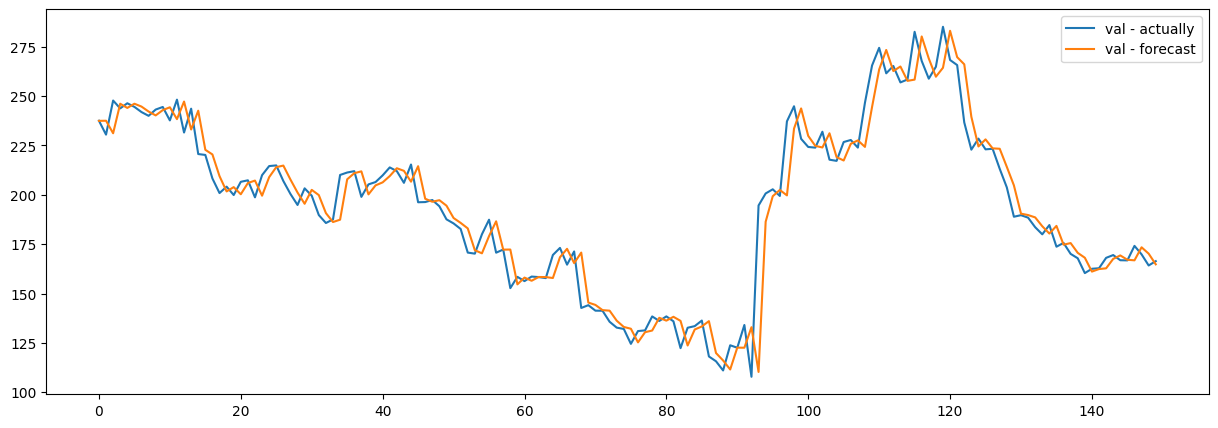

In [67]:
# so sánh val data dự đoán và val data thực tế

plt.figure(figsize=(15,5));
plt.plot(df_val,label='val - actually');
plt.plot(predict_val,label='val - forecast');

plt.legend();
plt.show();

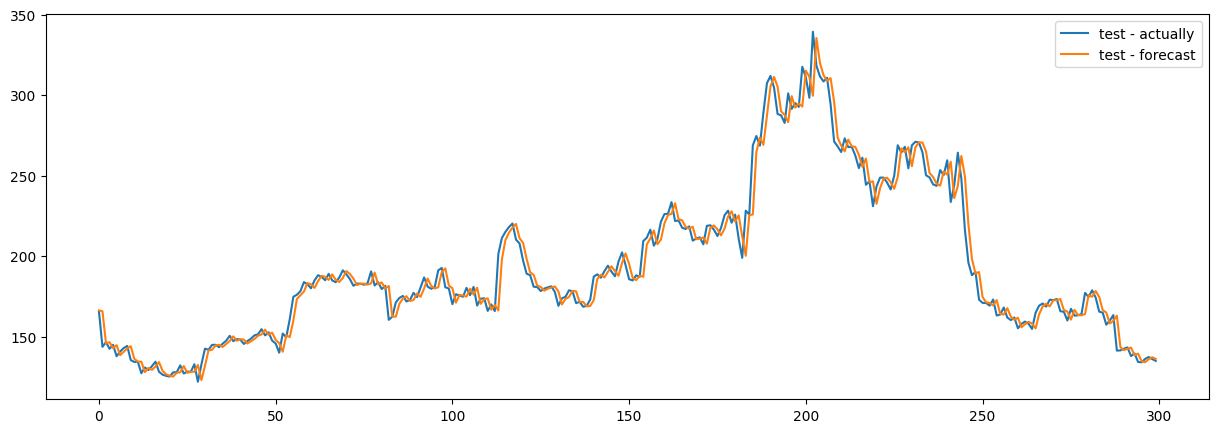

In [68]:
# so sánh test data dự đoán và test data thực tế

plt.figure(figsize=(15,5));
plt.plot(df_test,label='test - actually');
plt.plot(predict_test,label='test - forecast');

plt.legend();
plt.show();
